In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import fsolve

n = 10
v = 1.5

# 线性带的计算，从fsolver.ipynb复制过来，作为非线性布洛赫波的参数mu和牛顿迭代法初始值

def eig_res_sorted():
    data_zip = zip(data[0], data[1])
    data_sorted = sorted(data_zip, key=lambda x: x[0])
    eig_value = np.array([i[0] for i in data_sorted])
    eig_v = np.array([i[1] for i in data_sorted])

def linear_gap_calculation(k):
    '''
    线性带的计算，k 为参数
    超参数 n = 10
    '''
    diag_mx = np.arange(-n, n+1, 1)
    a = np.ones((2 * n + 1))
    H = np.diag(0.5 * (diag_mx ** 2 + 2 * diag_mx * k + a * k ** 2))+ \
            np.diag(np.ones((2 * n)) * v / 2, 1) + np.diag(np.ones((2 * n)) * v / 2, -1)
    
    #eig_value, eig_v = np.linalg.eig(H)
    data= np.linalg.eig(H)
    data_zip = zip(data[0], data[1].T)
    data_sorted = sorted(data_zip, key=lambda x: x[0])
    eig_value = np.array([i[0] for i in data_sorted])
    eig_v = np.array([i[1] for i in data_sorted])
    return eig_value, eig_v

linear_result = linear_gap_calculation(0)
print(linear_result)

(array([-0.92110385,  0.16892264,  0.98375806,  2.10557521,  2.21109787,
        4.56463334,  4.56537813,  8.03582528,  8.03582627, 12.52275493,
       12.52275493, 18.01574327, 18.01574327, 24.51154197, 24.51154197,
       32.00882535, 32.00882535, 40.50714055, 40.50714055, 50.05903744,
       50.05903744]), array([[ 5.73426714e-13, -3.89454653e-11,  2.15030602e-09,
        -9.43483169e-08,  3.19576751e-06, -8.05289169e-05,
         1.43785351e-03, -1.70224584e-02,  1.21602833e-01,
        -4.56596880e-01,  7.43559281e-01, -4.56596880e-01,
         1.21602833e-01, -1.70224584e-02,  1.43785351e-03,
        -8.05289169e-05,  3.19576751e-06, -9.43483168e-08,
         2.15030598e-09, -3.89453575e-11,  5.73613216e-13],
       [-2.52642632e-12,  1.67851058e-10, -9.02360955e-09,
         3.82807103e-07, -1.24097887e-05,  2.94657063e-04,
        -4.83217560e-03,  5.01601974e-02, -2.84831418e-01,
         6.45237616e-01, -2.14814789e-15, -6.45237616e-01,
         2.84831418e-01, -5.01601974e-0

In [21]:
# 生成a_g * a_l * a_n的求和式
def findlgn(m, L, F):
    result = 0
    for l in range(-L, L + 1):
        for g in range(-L, L + 1):
            for n in range(-L, L + 1):
                if l - g + n == m :
                    result += F[g + L] * F[l + L] * F[n + L]
    return result

# 生成一个方程
def genEq(m, L, k, v, mu, F):
    if m == L:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m - 1 + L]) / 2 + findlgn(m, L, F)
    elif m == -L:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m + 1 + L]) / 2 + findlgn(m, L, F)
    else:
        return (k * k / 2 + k * m + m * m / 2 - mu) * F[m + L] + (v * F[m - 1 + L]) / 2 + (v * F[m + 1 + L]) / 2 + findlgn(m, L, F)

# 第一个非线性能带布里渊区中心处的Bloch波
# 生成一个方程组
def fun(f):
    F = np.zeros(21)
    for m in range(-10, 11):
        # L取10，k取0（布里渊区中心）, v取1.5，mu取线性带带隙中间的值，也是非线性bloch波的能量值,-0.3
        F[m + 10] = genEq(m, 10, 0, 1.5, -0.3, f)
    return F

# 解方程组, xx是迭代的初始值，取的线性带第一个能带的a_m
xx= linear_result[1][0]
result = fsolve(fun, xx)

print(result)

[-3.77386484e-09  2.53022460e-08  5.18479682e-08 -1.69133836e-06
  7.35681119e-06  5.02370200e-05 -6.91070108e-04  7.32165320e-04
  3.35754363e-02 -2.17365060e-01  4.15151260e-01 -2.17365060e-01
  3.35754362e-02  7.32165352e-04 -6.91070118e-04  5.02370240e-05
  7.35681008e-06 -1.69133742e-06  5.18478876e-08  2.53021126e-08
 -3.77387370e-09]


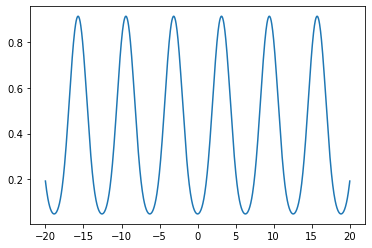

In [22]:
# 画下非线性波形
x_list = np.linspace(-20, 20, 1000)
phi_list = [1j for n in range(1000)]
k = 0
i = 0
for x in x_list:
    phi = 0
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * result[m + 10]
    phi_list[i] = phi * np.exp(1j * k * x)
    i += 1
phi_real_list = [phi.real for phi in phi_list]
plt.plot(x_list, phi_real_list)

In [23]:
# 第一个非线性能带布里渊区边界处的Bloch波
# 生成一个方程组
def fun(f):
    F = np.zeros(21)
    for m in range(-10, 11):
        # L取10，k取0.5（布里渊区边界）, v取1.5，mu取线性带带隙中间的值，也是非线性Bloch波的能量值,-0.3
        F[m + 10] = genEq(m, 10, 0.5, 1.5, -0.3, f)
    return F

# 解方程组, xx是迭代的初始值，取的线性带第一个能带的a_m
xx= linear_result[1][0]
result = fsolve(fun, xx)

print(result)

[-1.18911677e-08  3.03465361e-08  4.60619548e-07 -4.42787506e-06
  1.16066937e-06  2.38588202e-04 -1.33689848e-03 -6.52610777e-03
  1.00880819e-01 -3.50690430e-01  3.50690430e-01 -1.00880819e-01
  6.52610774e-03  1.33689851e-03 -2.38588220e-04 -1.16066273e-06
  4.42787344e-06 -4.60620041e-07 -3.03448636e-08  1.19002679e-08
 -7.66989642e-10]


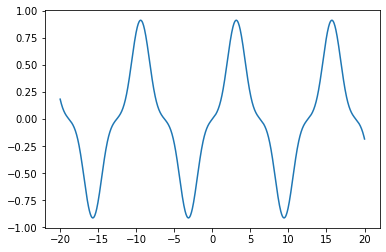

In [25]:
# 画下非线性波形
x2_list = np.linspace(-20, 20, 1000)
phi2_list = [1j for n in range(1000)]
k = 0.5
i = 0
for x in x_list:
    phi = 0;
    for m in range(-10, 11):
        phi += np.exp(1j * m * x) * result[m + 10]
    phi_list[i] = phi * np.exp(1j * k * x)
    i += 1
phi2_imag_list = [phi.imag for phi in phi_list]
plt.plot(x2_list, phi2_imag_list)

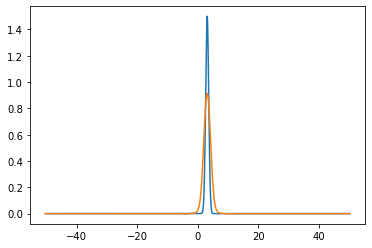

In [6]:
# 数值求解孤子解，从fsolver.ipynb复制过来
mu = -0.3

def cos_fun(num):
    return 1.5 * np.cos(num)

def normfun(x, mu_, sigma):
    pdf = np.exp(-((x - mu_)**2)/(2*sigma**2))# / (sigma * np.sqrt(2*np.pi))
    return pdf

def get_N(soliton, step):
    length = int(2 * np.pi / step)
    N_ = np.zeros(length)
    for i in range(len(soliton)):
        N_[i] = soliton[i] ** 2 * step
    return sum(N_)

def fun(f):
    step=32*np.pi/2048
    F = np.zeros(len(f))
    
    field = np.arange(-16*np.pi, 16*np.pi, 32*np.pi/2048)
    cos_f = cos_fun(field)
    
    # 第0
    F[0] = - 0.5 * \
           ((f[1] - 2 * f[0]) / step ** 2) + \
           cos_f[0] * f[0] + \
           np.abs(f[0]) ** 2 * f[0] - mu * f[0]
    # 最后一项
    F[-1] = - 0.5 * \
           ((f[-2] - 2 * f[-1]) / step ** 2) + \
           cos_f[-1] * f[-1] + \
           np.abs(f[-1]) ** 2 * f[-1] - mu * f[-1]
    # 第1到第N-1
    for i in range(1, len(F)-1):
        F[i] = - 0.5 * \
           ((f[i+1] + f[i-1] - 2 * f[i]) / step ** 2) + \
           cos_f[i] * f[i] + \
           np.abs(f[i]) ** 2 * f[i] - mu * f[i]
    return F

def init(x):
    #return np.cosh(x-np.pi) * 1.5 * normfun(x, 0, 1)
    #return 1.5 * normfun(x, np.pi, 0.5) * np.cosh(x - np.pi)
    #return 1 * normfun(x, np.pi, 1) * np.sin(x)
    #return -5 * np.cos(x - np.pi) * normfun(x, np.pi, 1)
    return 1.5 * normfun(x, np.pi, 0.5)

N = 2048
field = np.arange(-16*np.pi, 16*np.pi, 32*np.pi / N)

xx = init(field)
nf = normfun(field, np.pi, 0.5)
plt.plot(field, xx)

rslt = fsolve(fun, xx)
plt.plot(field, rslt, '-', x_list, phi_real_list, ':')
plt.show()

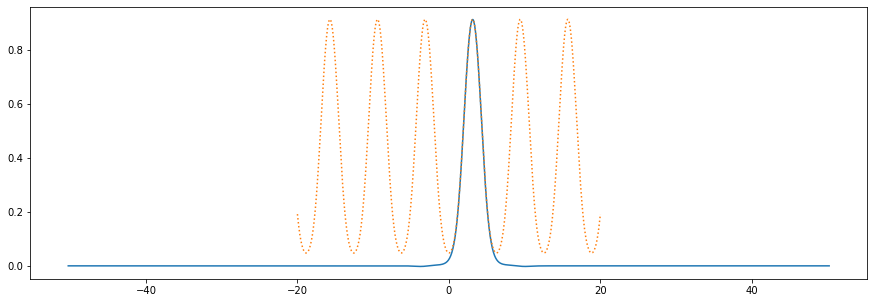

In [10]:
# 第一个非线性能带BZ中心处的Bloch波和基本能隙孤子
plt.figure(figsize=(15,5))
plt.plot(field, rslt, '-', x_list, phi_real_list, ':')

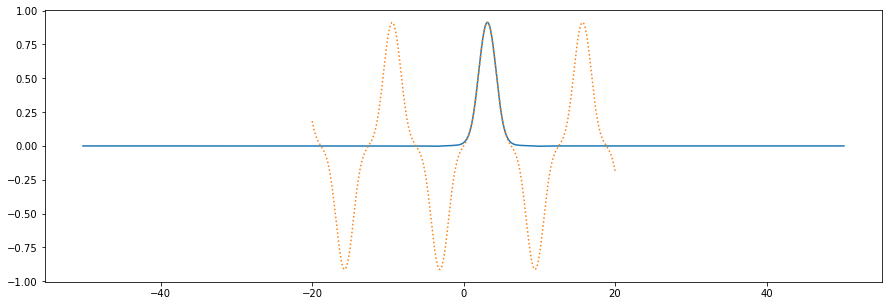

In [26]:
# 第一个非线性能带BZ边界处的Bloch波和基本能隙孤子
plt.figure(figsize=(15,5))
plt.plot(field, rslt, '-', x2_list, phi2_imag_list, ':')